In [1]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
import random
import pandas as pd
from collections import OrderedDict

In [2]:
from networks import get_model

In [3]:
def normalization(rgb_img,mean_list=[0.485, 0.456, 0.406],std_list=[0.229, 0.224, 0.225]):
    MEAN = 255 * np.array(mean_list)
    STD = 255 * np.array(std_list)
    rgb_img = rgb_img.transpose(-1, 0, 1)
    norm_img = (rgb_img - MEAN[:, None, None]) / STD[:, None, None]
    
    return norm_img

In [4]:
ckpt_path = "./results_crop/W_CA_to_C_crop/model/ResNet18_lgt_pcrop_W_CA_to_C_best.pth"

In [5]:
model_type = 'ResNet18_lgt'
max_iter=-1
total_cls_num = 2
normfc = False
usebias = True
feat_loss = 'supcon'

model = get_model(model_type, \
                  max_iter, total_cls_num, pretrained=False, \
                  normed_fc=normfc, use_bias=usebias, \
                  simsiam=True if feat_loss == 'simsiam' else False)

In [6]:
ckpt = torch.load(ckpt_path)
state_dict = ckpt['state_dict']

new_state_dict = OrderedDict()
for n, v in state_dict.items():
    name = n.replace("module.","") # dataparallel
    new_state_dict[name] = v
model.load_state_dict(new_state_dict)

In [7]:
_ = model.eval()

In [8]:
db = 'wild' # wild celebA casia
ca = 'align' # align or crop

csv_path = "safas/csv/{}_{}_list_test.csv"
csv_path = csv_path.format(db,ca)

In [9]:
df = pd.read_csv(csv_path,header=None)

In [10]:
values = df.values
random_val = random.choice(values)
img_path, id_val, lb_str = random_val

In [11]:
img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)

fake


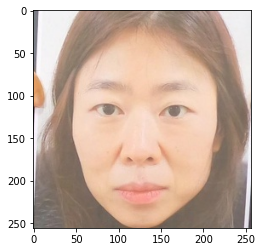

In [12]:
print(lb_str)
plt.imshow(img)

In [13]:
img = normalization(img)
img = img.astype(np.float32)
img = np.expand_dims(img,axis=0)
img = torch.tensor(img)

In [14]:
_, penul_feat, logit = model(img)
score = logit.squeeze().item() # real score

In [15]:
if score>=0.5:
    pred = 'real'
else:
    pred = 'fake'

In [16]:
print(score)
print(pred)

0.36976170539855957
fake
